Chapter 5 K-Nearest Neighbors 

reference : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

อ่านข้อมูลไฟล์ csv จาก https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/iris_data.csv

และเเสดง 5 ตัวอย่างเเรก เพื่อตรวจสอบข้อมูล

In [2]:
url='https://raw.githubusercontent.com/Kanabadee-KDS/basic-ml-dataset/main/iris_data.csv'
df=pd.read_csv(url)
df.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
3,4.6,3.1,1.5,0.2,Iris-setosa
85,7.6,3.0,6.6,2.1,Iris-virginica
11,4.8,3.4,1.6,0.2,Iris-setosa
123,5.0,3.5,1.6,0.6,Iris-setosa
49,5.2,2.7,3.9,1.4,Iris-versicolor


นับจำนวนคลาสหรือสายพันธุ์ของดอกไอริส ได้ดังนี้


In [3]:
df.Class.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64

เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล


In [4]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

ทดลองเเสดงค่าเฉลี่ยนในเเต่ละคุณลักษณะของเเต่ละสายพันธุ์ของดอกไอริส

In [5]:
df.groupby('Class').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


ในตัวอย่างนี้เลือกพิจารณาเพียง 4 หัวข้อ ประกอบด้วย ความยาวกลีบเลี้ยง(SepalLength) ความกว้างกลีบเลี้ยง(SepalWidth) ความยาวกลีบดอก(PetalLength) เเละ ความกว้างกลีบดอก(PetalWidth)

สร้างตัวเเปร ชื่อ cols เพื่อเก็บตัวเเปรที่สนใน ได้เเก่ SepalLength
SepalWidth
PetalLength
เเละ
PetalWidth

In [6]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

เเสดงความสัมพันธ์ระหว่างคุณลักษณะ(features) ของ SepalLength SepalWidth PetalLength เเละ PetalWidth  โดยใช้ pairplot ของ seaborn

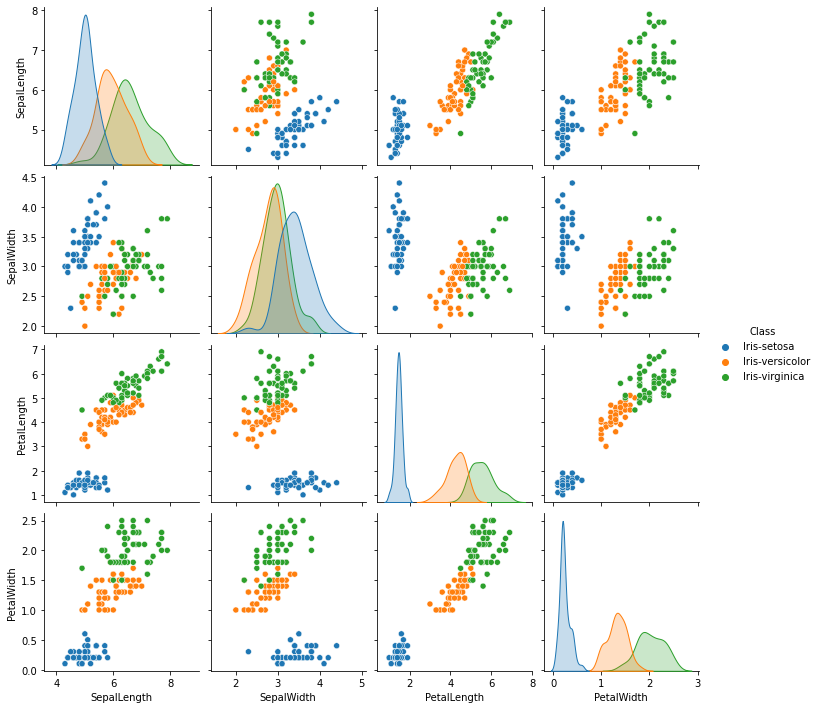

In [7]:
sns.pairplot(data=df,hue='Class');

จากกราฟ สามารถสังเกตได้ว่า ขนาด SepalLength SepalWidth PetalLength เเละ PetalWidth ของพันธุ์ Setosa มีความเเตกต่างกับสายพันธุ์อื่น

**จัดกลุ่มข้อมูล (Classification) ด้วยวิธี K-Nearest Neighbours โดยใช้ library ของ scikit learn**



นำเข้าคลาสของ KNeighborsClassifier StandardScaler เเละ train_test_split จาก scikit learn โดย

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # ปรับช่วงข้อมูลด้วยวิธี standardization

แบ่งชุดข้อมูลออกเป็นชุดฝึกฝนเเละชุดทดสอบ

In [9]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']], 
    df.Class, 
    test_size=test_size, random_state=7)

In [10]:
y_train.head()

126        Iris-setosa
79     Iris-versicolor
22         Iris-setosa
139    Iris-versicolor
74     Iris-versicolor
Name: Class, dtype: object

In [11]:
X_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
126,5.1,3.8,1.6,0.2
79,5.5,2.5,4.0,1.3
22,4.6,3.6,1.0,0.2
139,5.7,2.8,4.1,1.3
74,5.4,3.0,4.5,1.5


สร้างแบบจำลอง K-Nearest Neighbours ด้วยคลาส KNeighborsClassifier ใน Sklearn 

In [1]:
prefer_k = 5  # สร้างตัวเเปรสำหรับเก็บ k ที่ต้องการ
model = KNeighborsClassifier(n_neighbors=prefer_k)
model

NameError: name 'KNeighborsClassifier' is not defined

In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า $R^2$

In [14]:
model.score(X_train, y_train)

0.9666666666666667

In [15]:
model.score(X_test, y_test)

1.0

ทดลองทดสอบประสิทธิภาพแบบจำลองด้วย cross validation

In [16]:
from sklearn.model_selection import cross_val_score 

In [17]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([1.        , 0.83333333, 0.91666667, 0.95833333, 0.95833333])

เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ

In [18]:
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.933 (0.057)


ทดลองเเสดงค่าผลทำนายจากชุดข้อมูลทดสอบ


In [19]:
predicted = model.predict(X_test)

ทดลองเเสดงประสิทธิภาพแบบจำลอง

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,predicted,target_names=df.Class.unique(), digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000         6
Iris-versicolor      1.000     1.000     1.000        11
 Iris-virginica      1.000     1.000     1.000        13

       accuracy                          1.000        30
      macro avg      1.000     1.000     1.000        30
   weighted avg      1.000     1.000     1.000        30



ทดสอบทำนายผลด้วยค่ากำหนดเอง เช่น

In [22]:
predicted = model.predict([
[5, 3, 1.2, .3],
[5.432, 3.1, 2.3, .7],
[6.5, 3, 5, 2]
              ])

In [23]:
y_solution = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

ทดลองเเสดงค่าที่ทำนายผลถูก

In [24]:
dx=pd.DataFrame({'y_true': y_solution, 'y_pred': predicted})
dx[dx.y_true == dx.y_pred]

,y_true,y_pred
0,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica


ทดลองเเสดงค่าที่ทำนายผลผิด

In [25]:
dx=pd.DataFrame({'y_true': y_solution, 'y_pred': predicted})
# dx
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
1,Iris-versicolor,Iris-setosa


ทดลองหาค่า k ที่เหมาะสมที่สุด


In [26]:
# กำหนดช่วงค่า K ที่ต้องการทดสอบให้เท่ากับ 1 ถึง 25
k_list = list(range(1,25+1))
k_values = dict(n_neighbors=k_list)

**ปรับจูนพารามิเตอร์ของแบบจำลองโดยใช้ Library ชื่อ GridSearchCV ของ scikit-learn เพื่อทดสอบประสิทธิภาพของแบบจำลองสำหรับค่าพารามิเตอร์ต่าง ๆ ร่วมกับการประเมินผลด้วย cross-validation**

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, k_values, cv=5, scoring='accuracy')

เรียนรู้แบบจำลอง

In [28]:
grid.fit(df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']], df.Class)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

เเเสดงค่าประสิทธิภาพที่ได้

In [29]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003523,0.002591,0.003509,0.000872,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.001934,0.000192,0.002900,0.000182,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,25
2,0.001927,0.000164,0.002862,0.000206,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.002084,0.000350,0.002889,0.000206,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.001974,0.000150,0.002989,0.000281,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


ทดลองพล็อตกราฟค่าประสิทธิภาพ

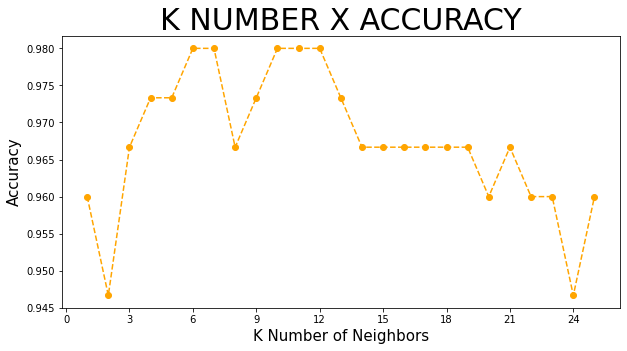

In [30]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='orange',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,26,3),)
plt.show()

เเสดงค่า k ที่ให้ประสิทธิภาพสูงสุด

In [31]:
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))

The best value of k = {'n_neighbors': 6} with 0.9800000000000001 of accuracy.
